In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

from scipy.signal import stft, istft
# Play the audio file using IPython.display
from IPython.display import Audio, display

In [2]:
from analysis import *
from plot import *
from formants import *

In [3]:
fname1, fname2 = "data/epi.wav", "data/speech-and-music.wav"  

y1, sr1 = librosa.load(fname1, sr=None) # sr=None preserves original sample rate
print(f"Audio 1 loaded successfully: Duration={librosa.get_duration(y=y1, sr=sr1):.2f}s, Sample Rate={sr1}Hz")

y2, sr2 = librosa.load(fname2, sr=None) # sr=None preserves original sample rate
print(f"Audio 2 loaded successfully: Duration={librosa.get_duration(y=y2, sr=sr2):.2f}s, Sample Rate={sr1}Hz")


Audio 1 loaded successfully: Duration=20.00s, Sample Rate=16000Hz
Audio 2 loaded successfully: Duration=14.20s, Sample Rate=16000Hz


## Analysis

In [4]:
display(Audio(data=y1, rate=sr1))

In [5]:
# Apply noise reduction
y_clean1 = reduce_noise(y1, sr1)
y_clean2 = reduce_noise(y2, sr1)



In [6]:
segments1 = split_audio_at_pause_boundaries(y_clean1, sr1)
for seg in segments1:
    display(Audio(data=seg, rate=sr2))

## Exploration

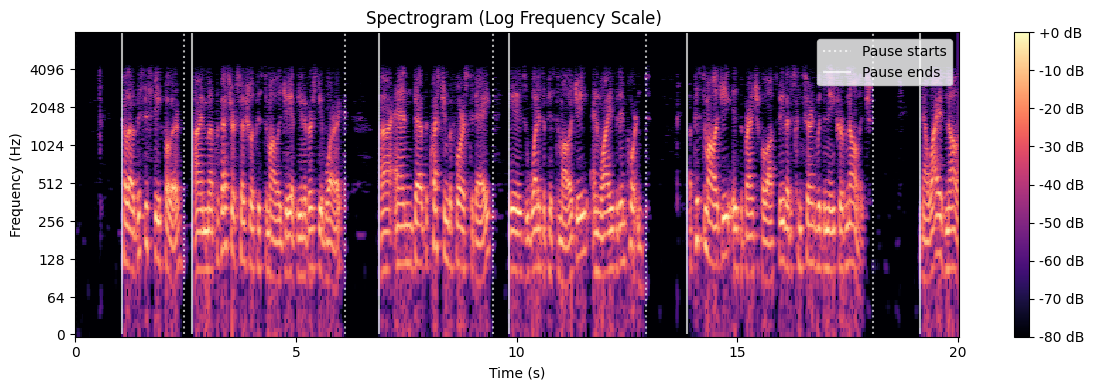

In [7]:
plot_spectrogram_with_pause_boundaries(y_clean1, sr1)

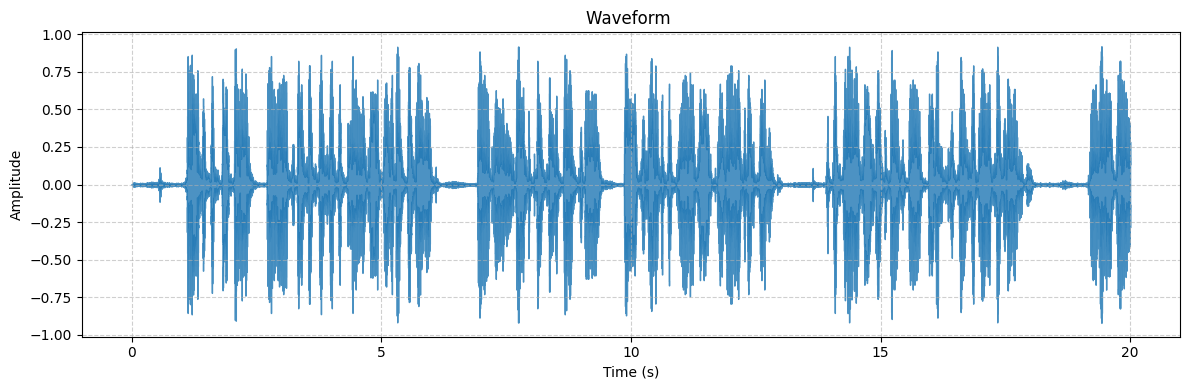

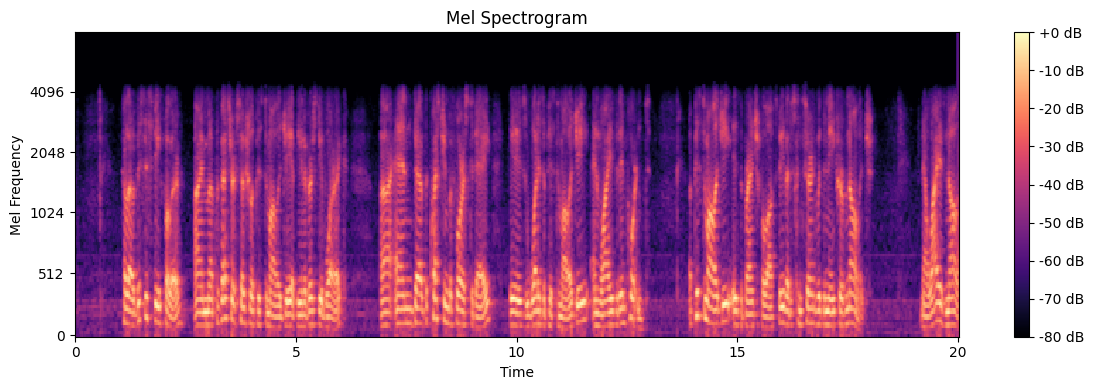

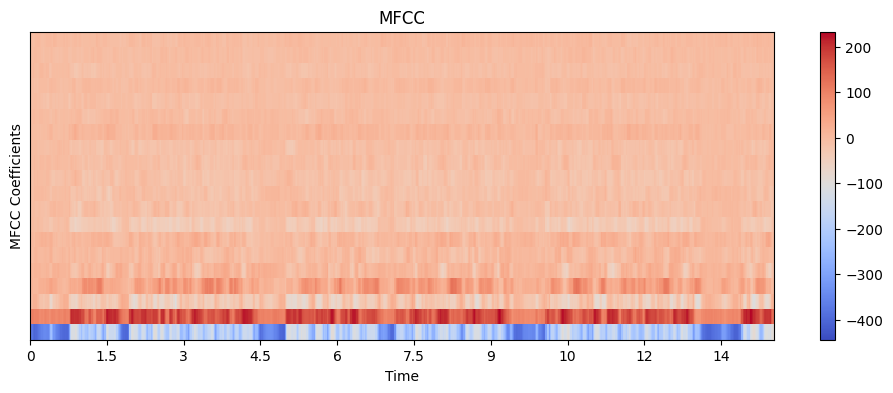

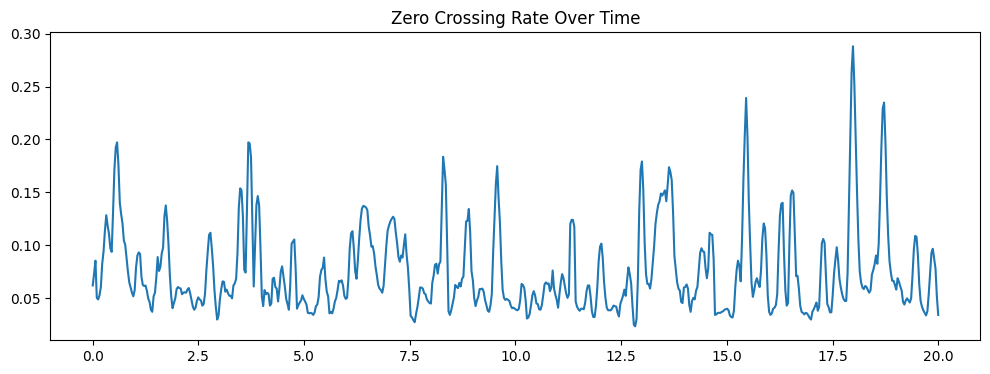

In [8]:
y, sr = y1, sr1
plot_waveform(y, sr)
plot_spectrogram(y, sr)
plot_spectrogram_mel(y, sr)
plot_mfcc(y, sr)
plot_zero_crossing_rate(y, sr)

Average frequencies:
F0: 120.1 Hz
H1: 120.1 Hz
H2: 240.3 Hz
H3: 360.4 Hz
H4: 480.5 Hz
H5: 600.7 Hz
F1: 423.7 Hz
F2: 1651.4 Hz
F3: 2767.4 Hz
F4: 3561.7 Hz



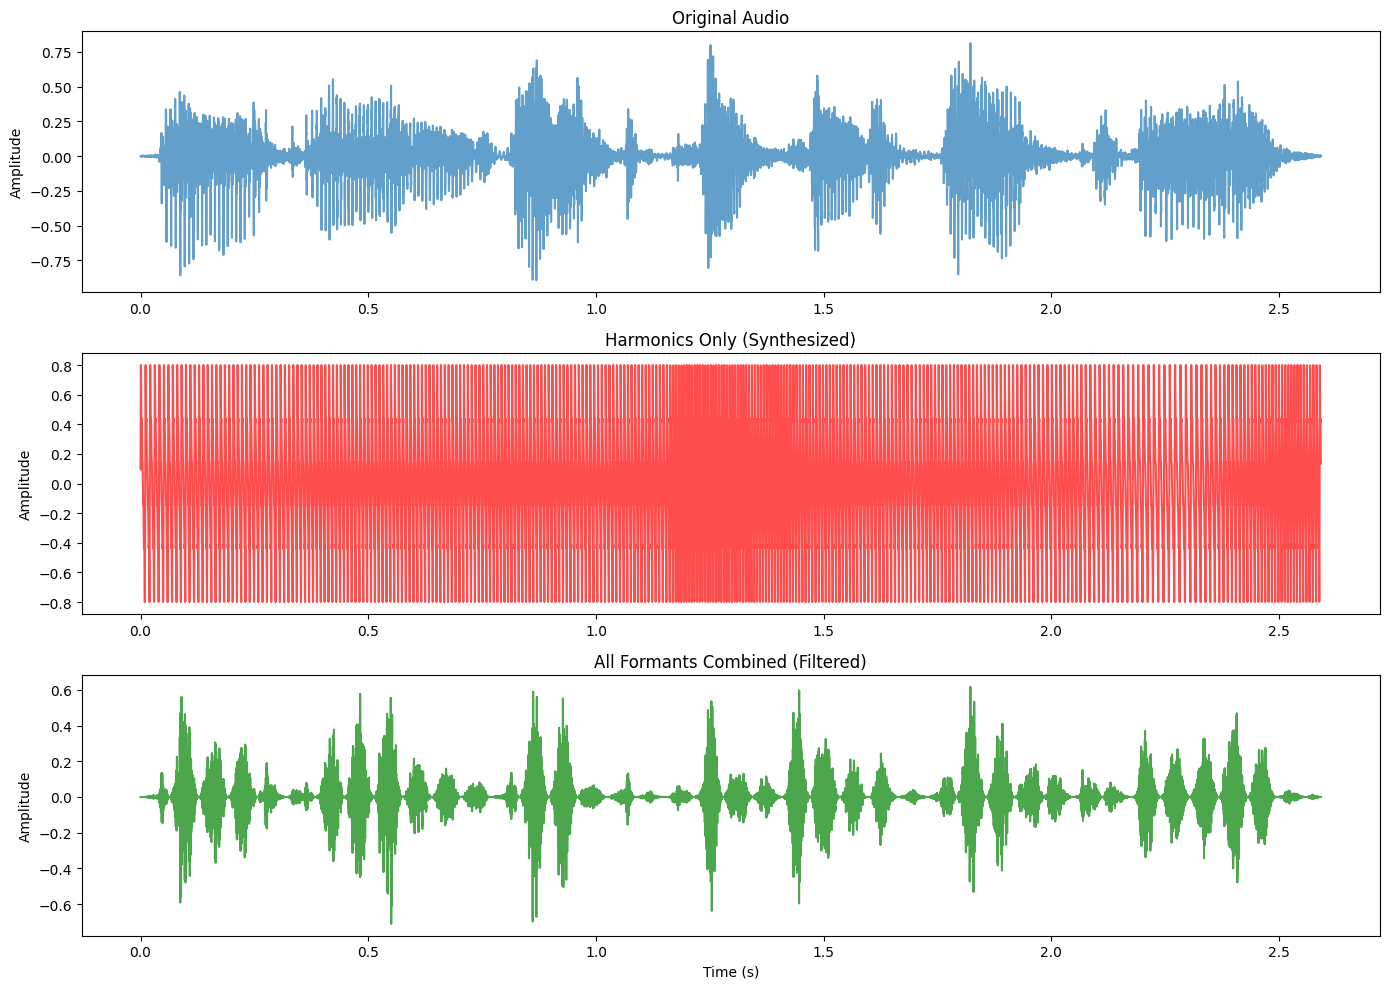

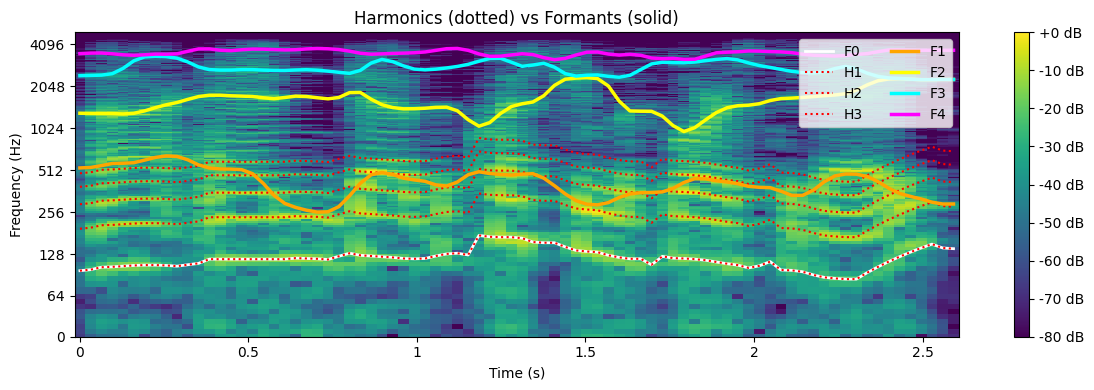

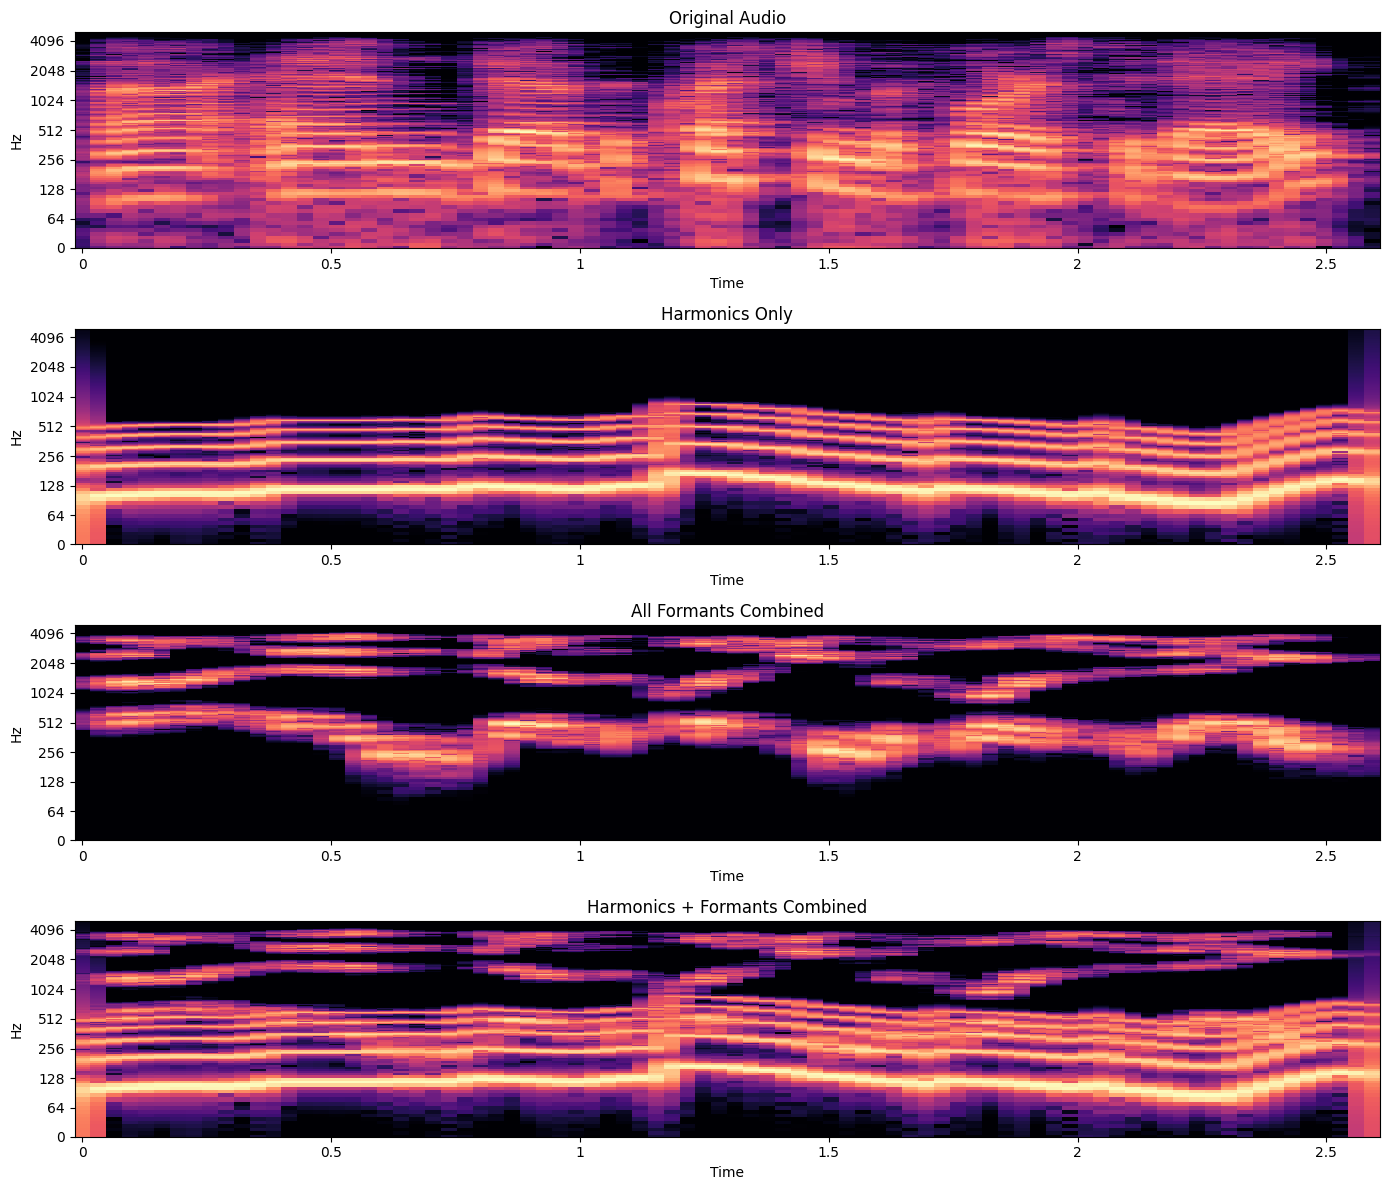

1. Original audio:



2. Harmonics only (buzzy/robotic sound):



3. Formant 1 only:



4. Formant 2 only:



5. Formant 3 only:



6. Formant 4 only:



7. All formants combined:



8. Harmonics + Formants combined:


In [9]:
y, sr = segments1[2], sr1

# Run the extraction and synthesis
results = extract_and_synthesize_all(y, sr)
plot_formant_harmonics_comparison(results, sr)

# Play all versions
print("1. Original audio:")
display(Audio(data=results['original'], rate=sr))

print("\n2. Harmonics only (buzzy/robotic sound):")
display(Audio(data=results['harmonics'], rate=sr))

print("\n3. Formant 1 only:")
display(Audio(data=results['formants'][0], rate=sr))

print("\n4. Formant 2 only:")
display(Audio(data=results['formants'][1], rate=sr))

print("\n5. Formant 3 only:")
display(Audio(data=results['formants'][2], rate=sr))

print("\n6. Formant 4 only:")
display(Audio(data=results['formants'][3], rate=sr))

print("\n7. All formants combined:")
display(Audio(data=results['all_formants'], rate=sr))

print("\n8. Harmonics + Formants combined:")
display(Audio(data=results['combined'], rate=sr))